<a href="https://colab.research.google.com/github/Jaskaran7d5/Takneek-precamp/blob/main/Jaskaran_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Edge detection
Our aim is to input the url of an image from the user an detect the edges present in the image.

In [ ]:
pip install wget #wget is used to download an image given the image url

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import cv2#used to open image
import wget

## Inputing the image and processing it

array([[[218, 149,  28],
        [239, 169,  47],
        [250, 175,  48],
        ...,
        [ 54,  13,  11],
        [ 59,  15,  12],
        [ 61,  17,  14]],

       [[215, 141,  20],
        [235, 159,  37],
        [254, 176,  50],
        ...,
        [ 63,  19,  16],
        [ 62,  17,  14],
        [ 62,  17,  12]],

       [[202, 116,   0],
        [212, 126,   5],
        [240, 155,  30],
        ...,
        [ 75,  26,  22],
        [ 68,  20,  16],
        [ 66,  19,  13]],

       ...,

       [[119,  52,  36],
        [133,  65,  52],
        [120,  52,  39],
        ...,
        [ 36,  17,  10],
        [ 92,  73,  67],
        [167, 150, 143]],

       [[ 96,  30,  16],
        [103,  37,  23],
        [ 99,  33,  21],
        ...,
        [ 60,  40,  33],
        [ 35,  16,  10],
        [ 41,  22,  18]],

       [[ 97,  31,  17],
        [ 94,  28,  14],
        [ 91,  24,  15],
        ...,
        [ 33,  13,   6],
        [ 55,  34,  31],
        [ 49,  30,  26]]], dtype=uint8)
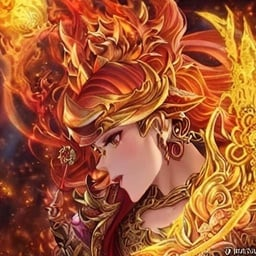

In [ ]:
url = input("Enter image url:")
name=wget.download(url)
img = cv2.imread(name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img

Now, we will convert the image to grayscale. This is done so that edge detection can be done better and also because we wont have to apply convulations to 3 different layers

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
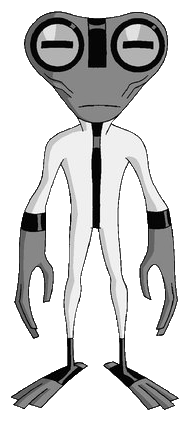

In [ ]:
arr=np.array(img)#converting our image to a numpy array
res=cv2.cvtColor(arr,cv2.COLOR_RGB2GRAY)#grayscaling our image
length,breadth=res.shape#storring dimensions of image
res

## Applying Sobel algorithm

For edge detection, we will be using Sobel operator. To detect edges, first we have to detect horizontal edges and vertical edges. We will do so by applying Convulations on our grayscale image matrix.

The kernel used for horizontal edge detection is \begin{bmatrix}
1 & 0 & -1\\
2 & 0 & -1\\
1 & 0 & -1
\end{bmatrix}
And matrix formed after convulation is $G_{x}$

The kernel used for vertical edge detection is \begin{bmatrix}
1 & 2 & 1\\
0 & 0 & 0\\
-1 & -2 & -1
\end{bmatrix}
And matrix formed after convulation is $G_{y}$

We define final matrix $G =\sqrt{G_x^{2}+G_y^{2}}$

In [ ]:
#defining filter to detect horizontal edges
kernelx = np.zeros((3,3))
kernelx[0,0]=-1
kernelx[1,0]=-2
kernelx[2,0]=-1
kernelx[:,2]=-kernelx[:,0]
kernelx

array([[-1.,  0.,  1.],
       [-2.,  0.,  2.],
       [-1.,  0.,  1.]])

Now, we will apply convulation onto the grayscale image to detect horizontal edges

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
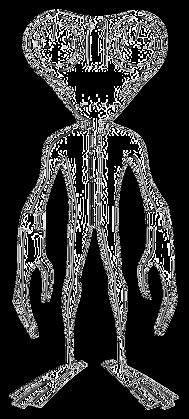

In [ ]:
gx = np.zeros((length-2,breadth-2))#dimensions of gx is as such as kernel is 3x3 size

#applying convulation
for i in range(0,length-2):
  for j in range(0,breadth-2):
    n = res[i:i+3,j:j+3]
    ss = np.multiply(n,kernelx)
    gx[i,j]=np.sum(ss)



In [ ]:
#defining kernel to get vertical edges
kernely = np.zeros((3,3))
kernely[0,0]=-1
kernely[0,1]=-2
kernely[0,2]=-1
kernely[2,:]=-kernely[0,:]
kernely

array([[-1., -2., -1.],
       [ 0.,  0.,  0.],
       [ 1.,  2.,  1.]])

In [ ]:

gy = np.zeros((length-2,breadth-2))#gy is convulation of kernely on res
#applying filter to find vertical edges
for i in range(0,length-2):
  for j in range(0,breadth-2):
    n = res[i:i+3,j:j+3]
    ss = np.multiply(n,kernely)
    gy[i,j]=np.sum(ss)

Now, we define G. this will be the image having edges.

In [ ]:
g = np.sqrt(np.square(gx)+np.square(gy))

g*=255/g.max()#Normalisation of the matrix is done.
#the logic bhind this is that the pixel with a higher value will be more bright and brightness in uint8 ranges from 0 to 255
g =g.astype('uint8')

Now we lets compare both our images.

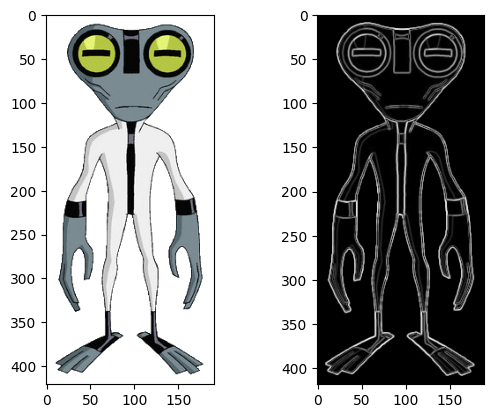

In [ ]:
f=plt.figure()
f.add_subplot(1,2,1)
plt.imshow(img)
f.add_subplot(1,2,2)
plt.imshow(g,cmap='gray')